In [1]:

from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
import re
T=True
F=False

In [2]:
%matplotlib notebook

In [3]:
#%matplotlib inline

In [4]:
from pyDebye.cluster import *

<IPython.core.display.Javascript object>

## make q-vector

In [5]:
q=np.linspace(0.001, 0.1, 500)  #for A-1

## make particles

In [6]:
D=      10 #diameter in nm 
sigma =  .05 # 0.05   #polydispersity
distribution_num_points = 30  #data poit number
spread = 3  #spread of the polydispersity
 
par1= { 'radius': D*10/2., 'delta_rho': 1.0 ,'sigma_R': sigma, 'color': Red,
       'distribution_num_points':distribution_num_points,'spread':spread 
         }
sp1s= SphereNanoObject( par1 )
sp1= SpherePolydisperseNanoObject( par1 )
#beta =  sp1.beta_ratio(q)

## make position and object dictionary for the cluster

In [20]:
lattice_objects = [ sp1s ]
lattice_coordinates = [ 0,0,0 ]

vector=np.array( [[ 1,0,0], [0,1.0,0], [0,0,1]]) * 300  #300 is 30 nm for lattice constant

h,k,l =  1, 1, 4  #the cluster have ( 1*2 +1, 1*2 +1, 2*2 +1 ), i.e. ( 3,3,5), size


In [21]:
cluster_pos_dict, cluster_obj_dict = build_cluster_dict( lattice_objects,lattice_coordinates, 
                                                         vector = vector,  
                                                         max_hkl =h, max_k=k,max_l=l, cluster_shape = 'c' ) 

/home/group/Software/Repos/pyDebye/pyDebye/Functions_For_Lattice_New.py:1550: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arrays =np.array( [mx,my,mz] )


## For refine the cluster positionsm

In [22]:

refine_cluster = False
if refine_cluster:
    Mx = cluster_pos_dict['o1'][:,0] > -10
    My = cluster_pos_dict['o1'][:,1] > -10
    Mxy = Mx&My
    Ncluster_pos_dict = {}
    Ncluster_pos_dict['o1']  = cluster_pos_dict['o1'][Mxy]
else:
    Ncluster_pos_dict = cluster_pos_dict
    Ncluster_pos_dict = cluster_pos_dict
#Ncluster_pos_dict = {}
#Ncluster_pos_dict['o1'] = np.array( your_pos )
#cluster_pos_dict
#cluster_obj_dict



## make a cluster

In [23]:
cls = cluster( q,  Ncluster_pos_dict, cluster_obj_dict )

In [24]:
cls.show()

<IPython.core.display.Javascript object>

## Calculate Iq, Sq

In [14]:
Iq = cls.get_Iq()
Sq = cls.get_Sq()

In [15]:
#Iq = Iq * np.exp( -db**2*d**2*q**2)

## Plot results

<IPython.core.display.Javascript object>


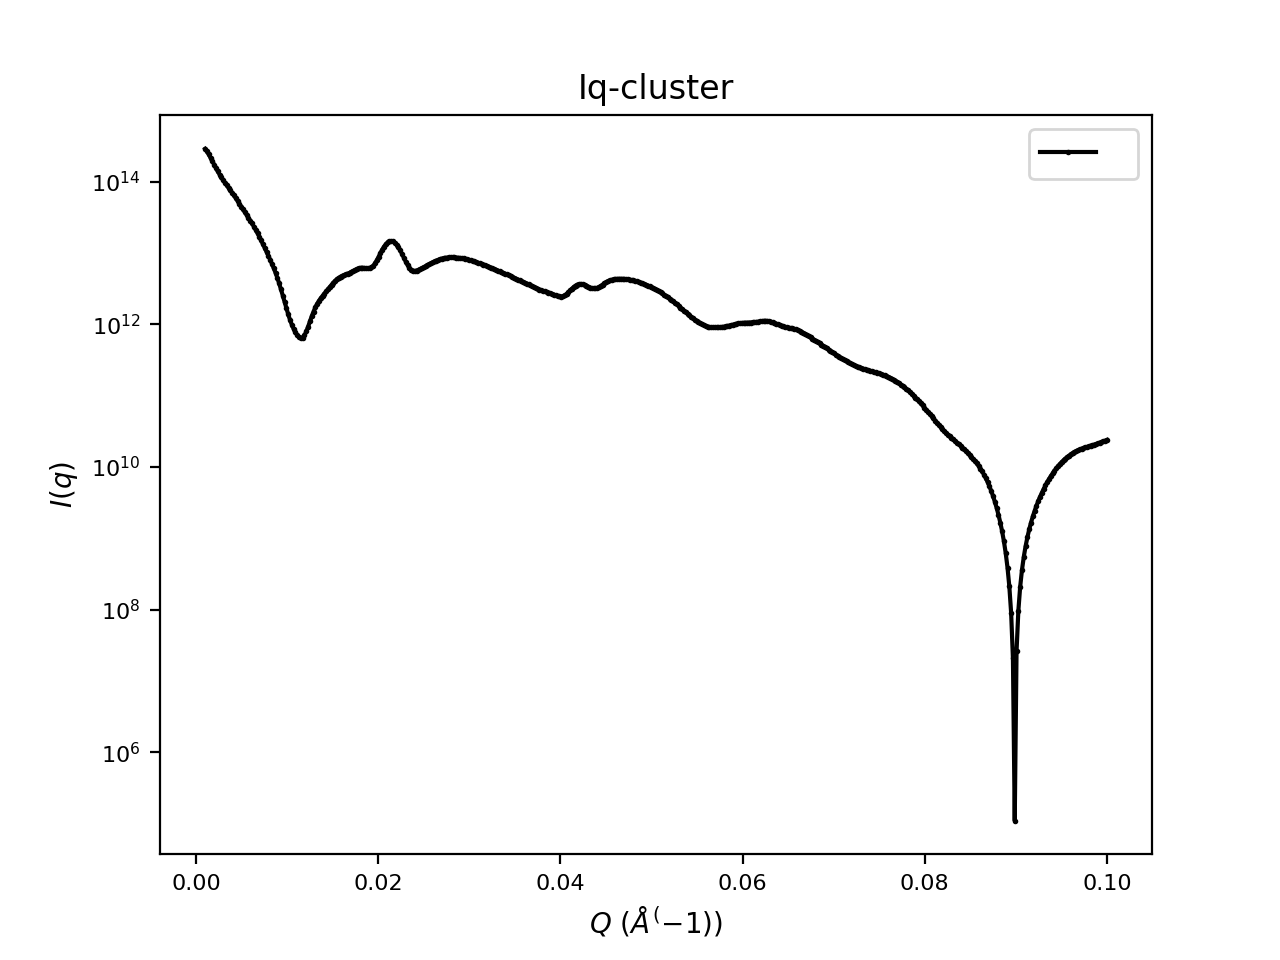

In [16]:
fig, ax = plt.subplots()
plot1D( x=q, y= Iq,ax=ax,m='o',c='k',  markersize=1,
        logy=True, xlabel=r'$Q\ (\AA^(-1))$', ylabel=r'$I(q)$', title='Iq-cluster' )

<IPython.core.display.Javascript object>


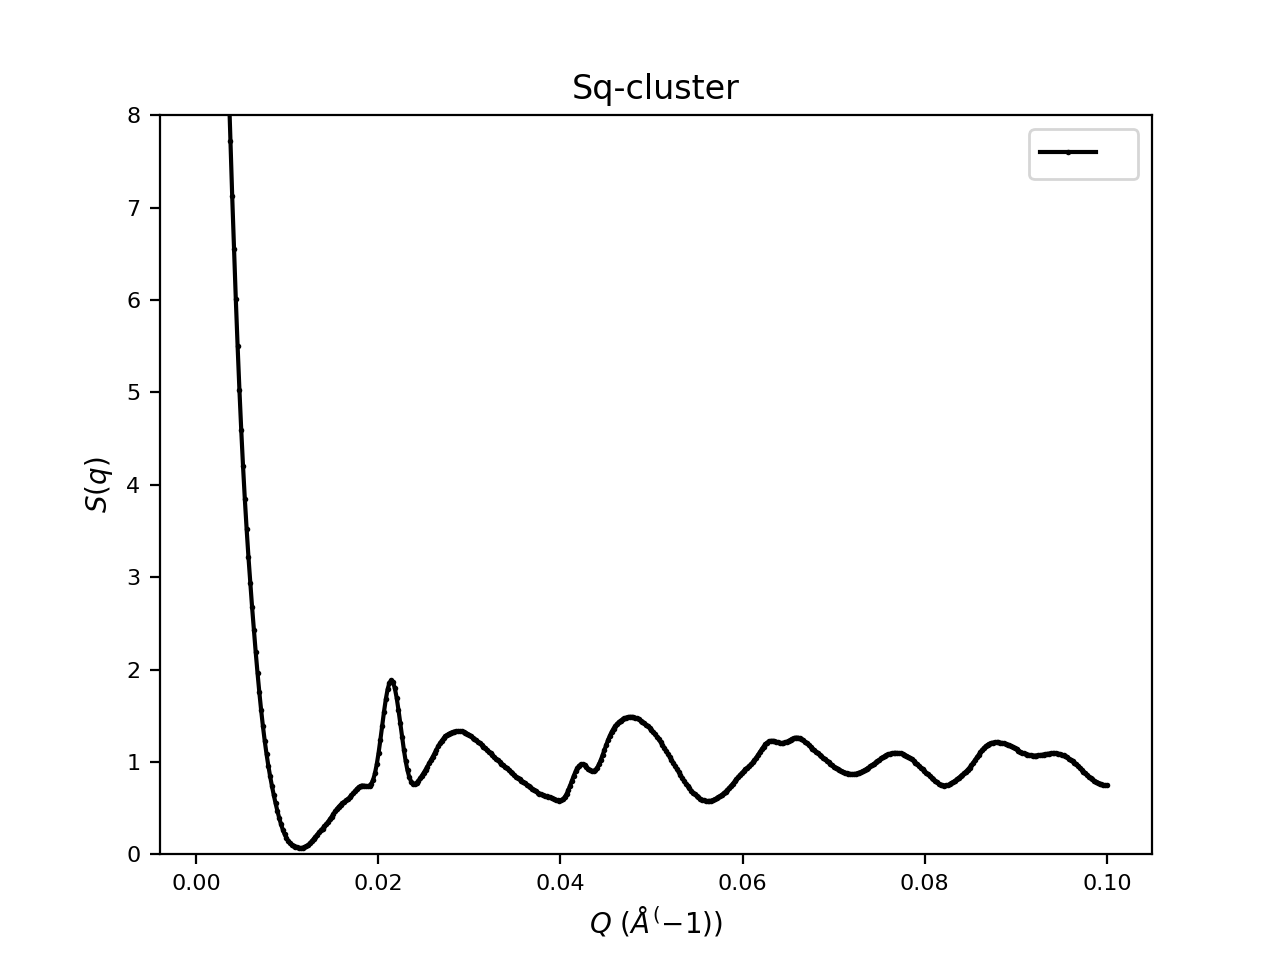

In [17]:
fig, ax = plt.subplots()
plot1D( x=q, y= Sq,ax=ax,m='o',c='k', markersize=1, ylim=[0,8], 
       xlabel=r'$Q\ (\AA^(-1))$', ylabel=r'$S(q)$', title='Sq-cluster' )